In [10]:
import pandas as pd

In [11]:
import numpy as np

This file is an attempt to use a neural network with 3 deep layers, and 3 outputs to predict goals for away teams and home teams as well as the winner of the game

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#to clarify, the columns targeted are going to be 'goals_home', 'goals_away', 'result_home'

In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:
tf.autograph.experimental.do_not_convert

<function tensorflow.python.autograph.impl.api.do_not_convert(func=None)>

In [16]:
all_merged = pd.read_csv('/Users/mikhail/Jupyter/Jupyter-1/Projects/Football Project/all_merged.csv')
all_merged_copy = all_merged.copy()

In [17]:
output = all_merged[['goals_home','goals_away','result_home']]

In [18]:
all_merged = all_merged.drop(columns=['goals_home','goals_away','result_home','gameID'])

In [19]:
X_train_full, X_test, y_train_full, y_test = train_test_split(all_merged,output)

In [20]:
X_train,X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

In [21]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(300,activation='tanh')(input_)
hidden2 = keras.layers.Dense(200,activation='tanh')(hidden1)
hidden3 = keras.layers.Dense(100,activation='tanh')(hidden2)
output_hg = keras.layers.Dense(1,name ='output_hg')(hidden3)
output_ag = keras.layers.Dense(1,name ='output_ag')(hidden3)
output_r = keras.layers.Dense(1,name ='output_r')(hidden3)
model = keras.Model(inputs = [input_],outputs=[output_ag,output_hg,output_r])

In [22]:
model.compile(loss=['mse','mse','mse'],loss_weights=[0.33,0.33,0.33],optimizer='sgd')
#loss_weights=[0.2,0.2,0.6]


In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)

history = model.fit(X_train,[y_train['goals_home'],y_train['goals_away'],y_train['result_home']],epochs = 200,
validation_data=(X_valid,[y_valid['goals_home'],y_valid['goals_away'],y_valid['result_home']]),callbacks=early_stopping_cb)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-02-04 22:14:00.900605: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-04 22:14:00.900859: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


 1/47 [..............................] - ETA: 10s - loss: 2.5137 - output_ag_loss: 2.4635 - output_hg_loss: 1.9349 - output_r_loss: 3.2190WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x1680f8040> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
47/47 [==============================] - 1s 7ms/step - loss: 1.6884 - output_ag_lo

In [24]:
model.get_weights()

[array([[-0.09904379, -0.08964425,  0.05582453, ...,  0.0490144 ,
          0.05669399, -0.13558084],
        [ 0.00041695,  0.0675286 ,  0.07946692, ..., -0.06906979,
         -0.010229  ,  0.10448298],
        [-0.04787377,  0.0632387 ,  0.12811913, ...,  0.0269019 ,
          0.00158911,  0.10162155],
        ...,
        [ 0.10848259,  0.07856623,  0.02161885, ...,  0.00666361,
          0.07267883,  0.02189003],
        [-0.0110563 ,  0.03989616,  0.06631355, ..., -0.07567948,
          0.00909019,  0.0808403 ],
        [ 0.08796612, -0.03648966, -0.13099411, ...,  0.04553176,
          0.04806817,  0.02818969]], dtype=float32),
 array([-1.19736695e-04,  6.68546782e-05, -2.55265729e-08,  1.82087955e-04,
        -4.13872892e-09, -4.31655394e-07,  4.24599886e-04,  1.24880316e-04,
         0.00000000e+00,  3.49241127e-05, -1.07349493e-04,  8.57423656e-05,
        -1.83698191e-07, -2.29280435e-08,  0.00000000e+00,  7.44362696e-05,
        -2.61664791e-05,  7.75685185e-05, -8.84665923e

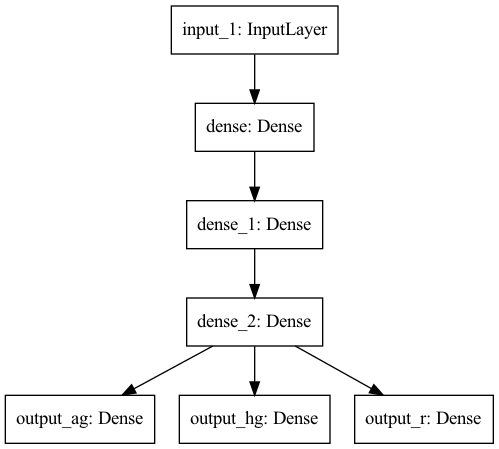

In [25]:
keras.utils.plot_model(model, "football_project.png")

In [26]:
total_loss, hg_loss, ag_loss, r_loss = model.evaluate(X_test,[y_test['goals_home'],y_test['goals_away'],y_test['result_home']])

21/21 [==============================] - 0s 409us/step - loss: 90651.6797 - output_ag_loss: 1.7277 - output_hg_loss: 137202.8594 - output_r_loss: 137497.4062


In [27]:
model.save('/Users/mikhail/Jupyter/Jupyter-1/Projects/football_model')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /Users/mikhail/Jupyter/Jupyter-1/Projects/football_model/assets


/Users/mikhail/miniforge3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
2022-02-04 22:14:05.102430: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/Users/mikhail/miniforge3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '
